In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torchvision
from torchvision import datasets, transforms, models
import imageio
import time
import warnings
import random
import sys
import copy
import json
from PIL import Image

In [2]:
data_dir = 'H:\\Study\\datasets\\flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

In [4]:
data_transforms = {
    'train': transforms.Compose([        
        transforms.RandomRotation(45),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1),
        transforms.RandomGrayscale(p=0.025),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [5]:
batch_size = 32

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

In [8]:
with open(os.path.join(data_dir, 'cat_to_name.json'), 'r') as f:
    cat_to_name = json.load(f)

In [10]:
def im_convert(tensor):
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1, 2, 0)
    image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    image = image.clip(0, 1)
    return image

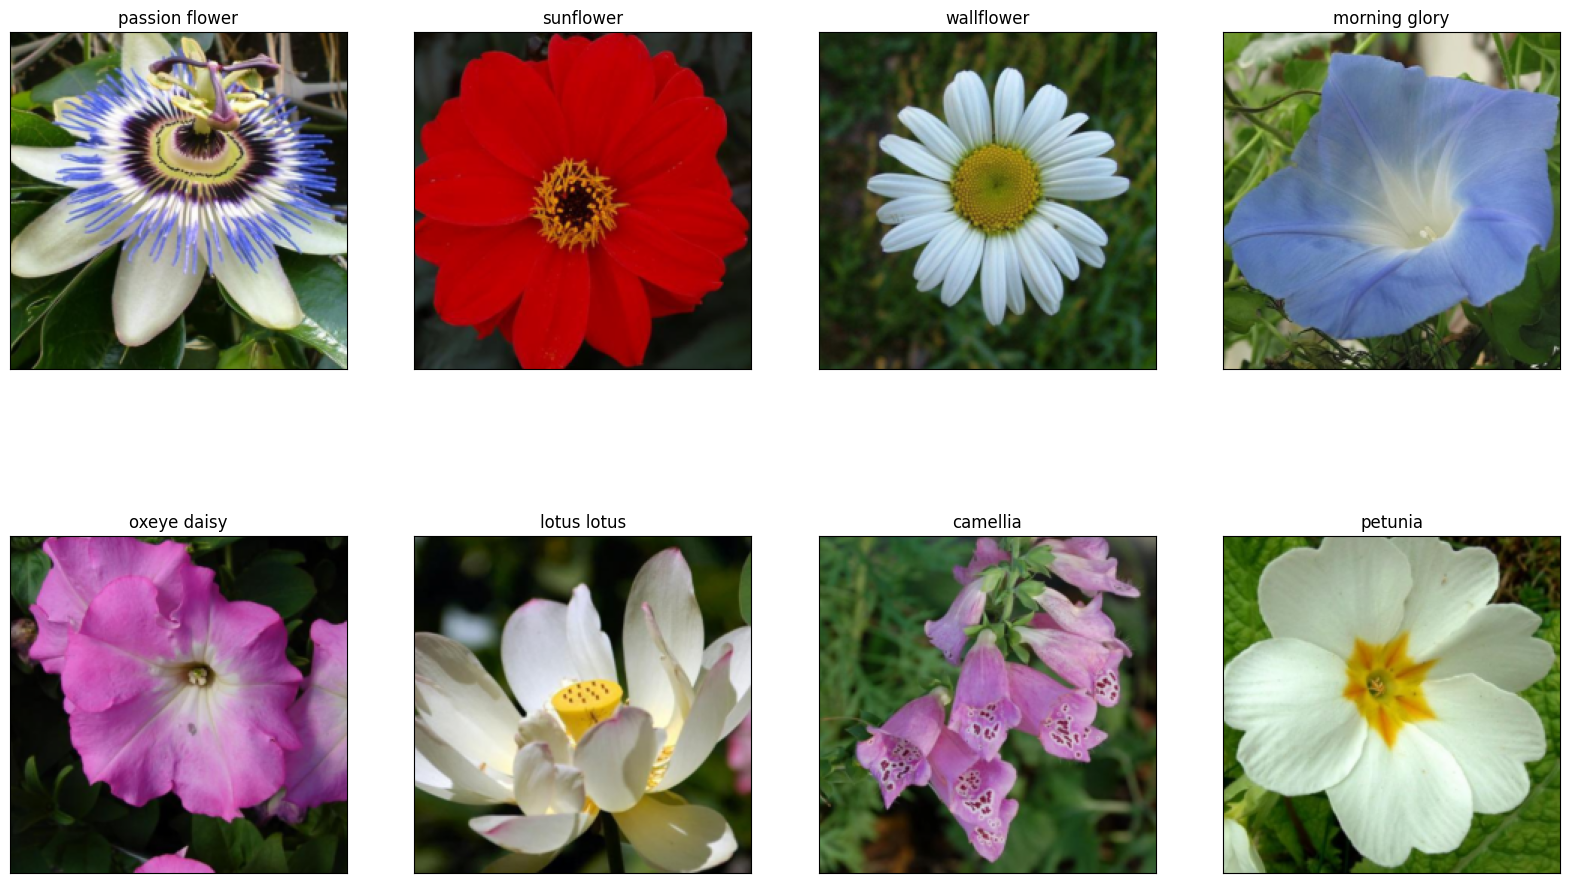

In [12]:
fig = plt.figure(figsize=(20, 12))
columns = 4
rows = 2

dataiter = iter(dataloaders['valid'])
inputs, classes = next(dataiter)

for idx in range(columns * rows):
    ax = fig.add_subplot(rows, columns, idx + 1, xticks=[], yticks=[])
    ax.set_title(cat_to_name[str(int(classes[idx]))])
    plt.imshow(im_convert(inputs[idx]))

plt.show()